# This notebook examines the cleanded TOP and MRI datasets and makes alternative distributions

Note this must be run in the normal 'mrilanding' environment

## import libraries and data

In [5]:
import os 
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [8]:
filepath_mri = '../open_work/internal_results/cleaned_pvc2s/' 
filename_mri = os.path.join(filepath_mri,'StrokeMRI_pvc2c.csv') 
stroke_mri = pd.read_csv(filename_mri )
filepath_top = '../open_work/internal_results/cleaned_pvc2s/' 
filename_top = os.path.join(filepath_top,'TOP_pvc2c.csv') 
top = pd.read_csv(filename_top)

## Let's see the distributions

In [10]:
top.head(3)

,Unnamed: 0,participant_id,age,sex,gm_vol,wm_vol,csf_vol,gm_ivc_ratio,gmwm_ivc_ratio,wmh_vol,...,deepwm_b_cov,aca_b_cov,mca_b_cov,pca_b_cov,totalgm_b_cov,deepwm_b,aca_b,mca_b,pca_b,totalgm_b
0,0,sub-0001_1_ses-1_run-1,43.49,M,0.71736,0.52803,0.31812,0.45881,0.45881,1.743,...,8.7620,2.2748,2.3205,2.6858,2.4316,22.1022,80.4744,68.3224,52.4614,60.6981
1,1,sub-0002_1_ses-1_run-1,38.30,F,0.72383,0.62394,0.25673,0.45112,0.45112,1.629,...,9.0749,1.7564,2.3989,1.5982,1.9738,23.5401,87.3972,78.0359,63.9932,71.6047
2,2,sub-0019_1_ses-1_run-1,32.30,M,0.71224,0.53295,0.33594,0.45046,0.45046,0.621,...,8.8791,1.9850,1.8702,2.1648,2.1723,27.5573,94.0855,86.3816,62.6012,74.0588


In [11]:
numeric_columns = [
    'age',
    'gm_vol',
    'wm_vol',
    'csf_vol',
    'gm_ivc_ratio',
    'gmwm_ivc_ratio',
    'wmh_vol',
    'wmh_count',
    'deepwm_b_cov',
    'aca_b_cov',
    'mca_b_cov',
    'pca_b_cov',
    'totalgm_b_cov',
    'deepwm_b', 
    'aca_b', 
    'mca_b', 
    'pca_b', 
    'totalgm_b', 
]

array([<AxesSubplot:title={'center':'age'}>,
       <AxesSubplot:title={'center':'gm_vol'}>,
       <AxesSubplot:title={'center':'wm_vol'}>,
       <AxesSubplot:title={'center':'csf_vol'}>,
       <AxesSubplot:title={'center':'gm_ivc_ratio'}>,
       <AxesSubplot:title={'center':'gmwm_ivc_ratio'}>,
       <AxesSubplot:title={'center':'wmh_vol'}>,
       <AxesSubplot:title={'center':'wmh_count'}>,
       <AxesSubplot:title={'center':'deepwm_b_cov'}>,
       <AxesSubplot:title={'center':'aca_b_cov'}>,
       <AxesSubplot:title={'center':'mca_b_cov'}>,
       <AxesSubplot:title={'center':'pca_b_cov'}>,
       <AxesSubplot:title={'center':'totalgm_b_cov'}>,
       <AxesSubplot:title={'center':'deepwm_b'}>,
       <AxesSubplot:title={'center':'aca_b'}>,
       <AxesSubplot:title={'center':'mca_b'}>,
       <AxesSubplot:title={'center':'pca_b'}>,
       <AxesSubplot:title={'center':'totalgm_b'}>], dtype=object)

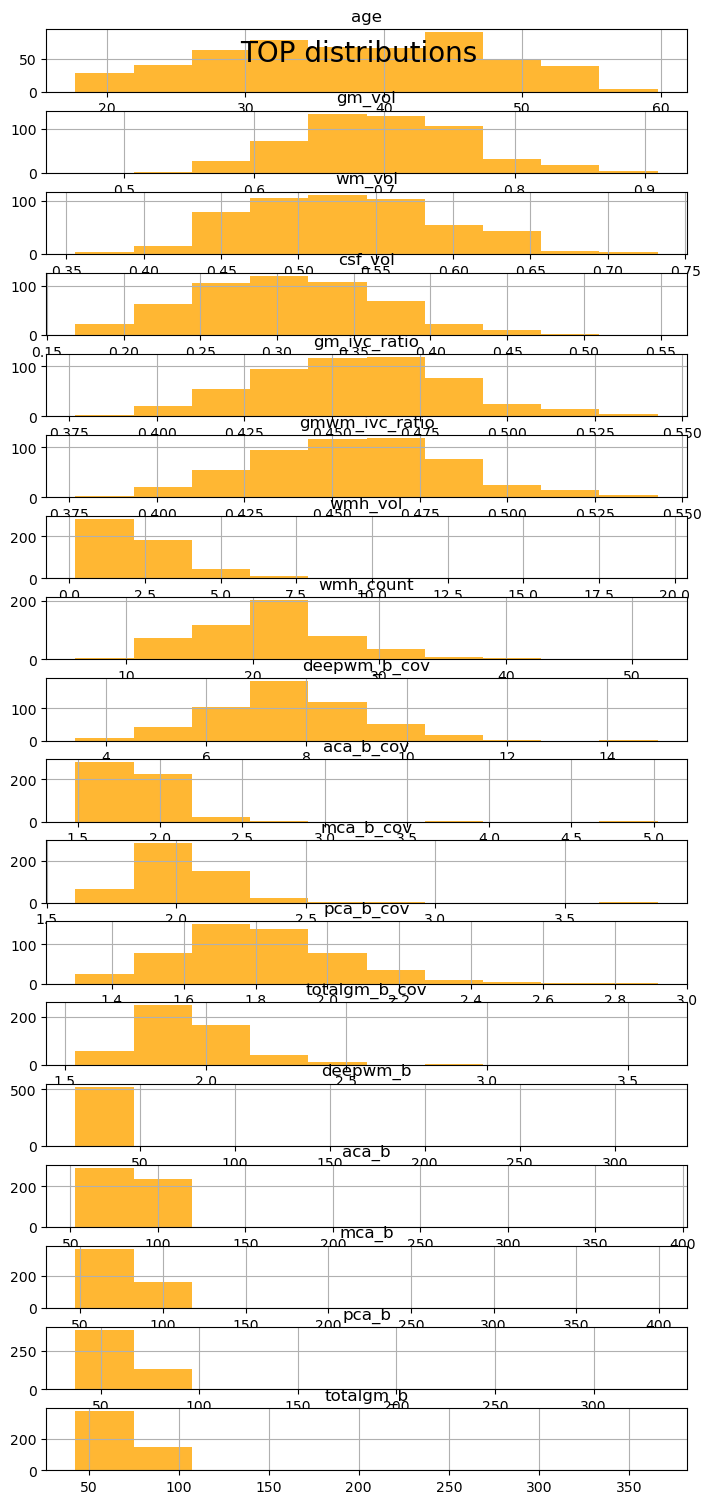

In [29]:
fig, axis = plt.subplots(len(numeric_columns), 1, figsize=(7,15))
fig.tight_layout()
fig.suptitle('TOP distributions ', fontsize=20)
top[numeric_columns].hist(ax = axis, color='orange', alpha=0.8,)

array([<AxesSubplot:title={'center':'age'}>,
       <AxesSubplot:title={'center':'gm_vol'}>,
       <AxesSubplot:title={'center':'wm_vol'}>,
       <AxesSubplot:title={'center':'csf_vol'}>,
       <AxesSubplot:title={'center':'gm_ivc_ratio'}>,
       <AxesSubplot:title={'center':'gmwm_ivc_ratio'}>,
       <AxesSubplot:title={'center':'wmh_vol'}>,
       <AxesSubplot:title={'center':'wmh_count'}>,
       <AxesSubplot:title={'center':'deepwm_b_cov'}>,
       <AxesSubplot:title={'center':'aca_b_cov'}>,
       <AxesSubplot:title={'center':'mca_b_cov'}>,
       <AxesSubplot:title={'center':'pca_b_cov'}>,
       <AxesSubplot:title={'center':'totalgm_b_cov'}>,
       <AxesSubplot:title={'center':'deepwm_b'}>,
       <AxesSubplot:title={'center':'aca_b'}>,
       <AxesSubplot:title={'center':'mca_b'}>,
       <AxesSubplot:title={'center':'pca_b'}>,
       <AxesSubplot:title={'center':'totalgm_b'}>], dtype=object)

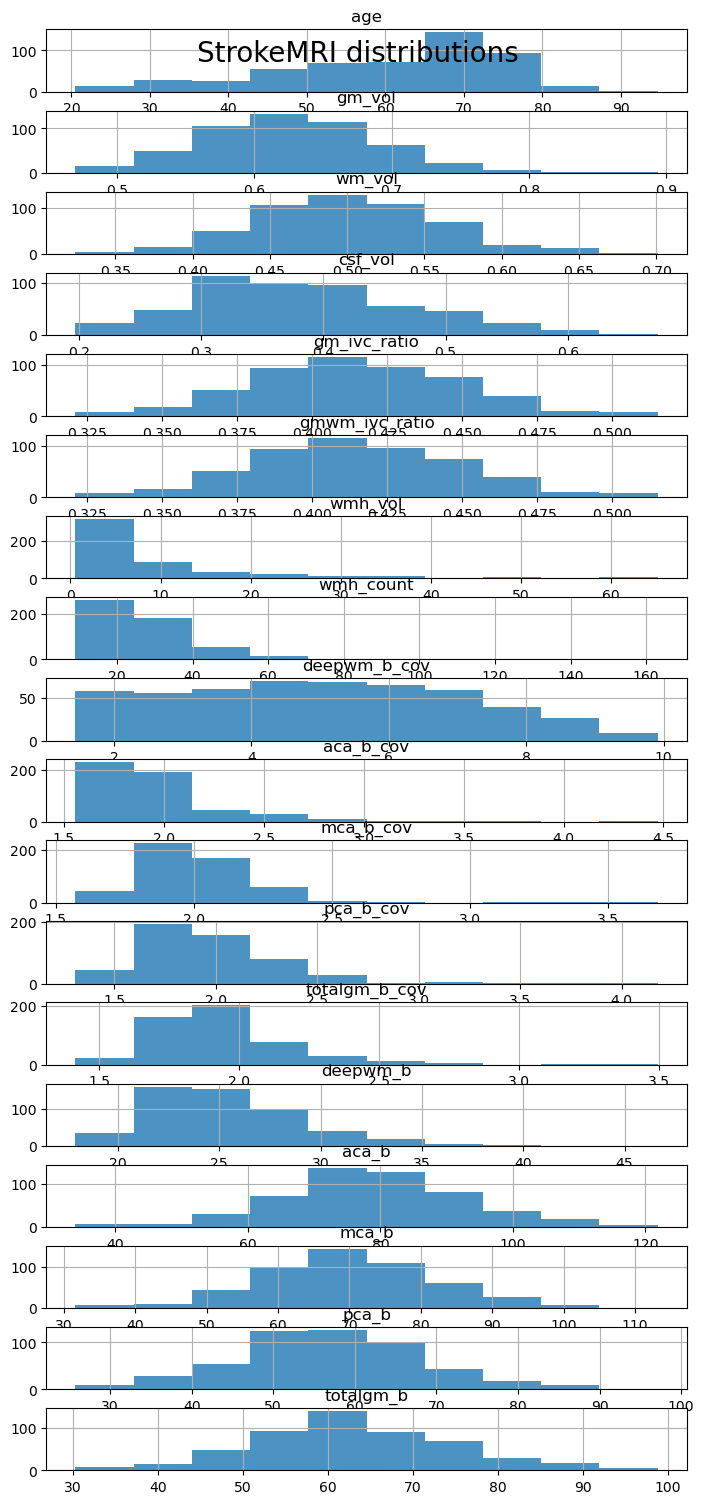

In [28]:
fig, axis = plt.subplots(len(numeric_columns), 1, figsize=(7,15))
fig.tight_layout()
fig.suptitle('StrokeMRI distributions ', fontsize=20)
stroke_mri[numeric_columns].hist(ax = axis, alpha=0.8)

array([<AxesSubplot:title={'center':'age'}>,
       <AxesSubplot:title={'center':'gm_vol'}>,
       <AxesSubplot:title={'center':'wm_vol'}>,
       <AxesSubplot:title={'center':'csf_vol'}>,
       <AxesSubplot:title={'center':'gm_ivc_ratio'}>,
       <AxesSubplot:title={'center':'gmwm_ivc_ratio'}>,
       <AxesSubplot:title={'center':'wmh_vol'}>,
       <AxesSubplot:title={'center':'wmh_count'}>,
       <AxesSubplot:title={'center':'deepwm_b_cov'}>,
       <AxesSubplot:title={'center':'aca_b_cov'}>,
       <AxesSubplot:title={'center':'mca_b_cov'}>,
       <AxesSubplot:title={'center':'pca_b_cov'}>,
       <AxesSubplot:title={'center':'totalgm_b_cov'}>,
       <AxesSubplot:title={'center':'deepwm_b'}>,
       <AxesSubplot:title={'center':'aca_b'}>,
       <AxesSubplot:title={'center':'mca_b'}>,
       <AxesSubplot:title={'center':'pca_b'}>,
       <AxesSubplot:title={'center':'totalgm_b'}>], dtype=object)

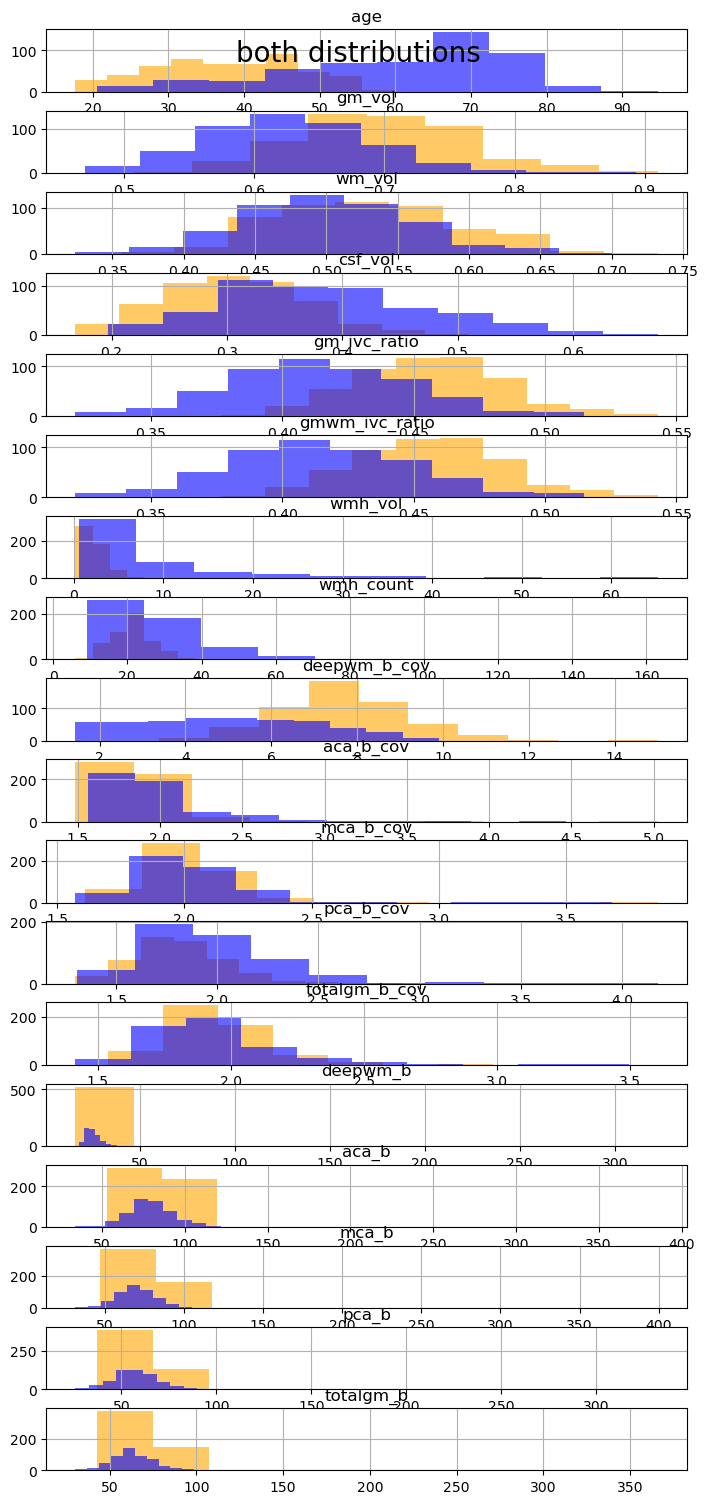

In [30]:
fig, axis = plt.subplots(len(numeric_columns), 1, figsize=(7,15))
fig.tight_layout()
fig.suptitle('both distributions ', fontsize=20)
top[numeric_columns].hist(ax = axis, color='orange', alpha=0.6,)
stroke_mri[numeric_columns].hist(ax = axis, color='blue', alpha=0.6,)

In [37]:
top['deepwm_b'].describe()

count    527.000000
mean      24.449396
std       13.260177
min       16.284600
25%       21.995400
50%       23.678700
75%       25.496400
max      322.480500
Name: deepwm_b, dtype: float64

In [38]:
stroke_mri['deepwm_b'].describe()

count    514.000000
mean      25.339487
std        3.784152
min       17.913100
25%       22.691775
50%       24.735500
75%       27.516700
max       46.626200
Name: deepwm_b, dtype: float64

<AxesSubplot:>

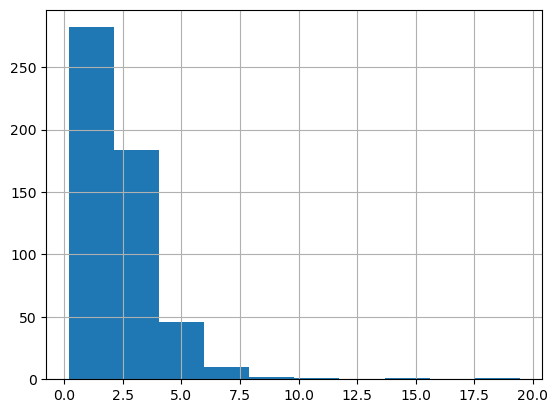

In [39]:
top['wmh_vol'].hist()

<AxesSubplot:>

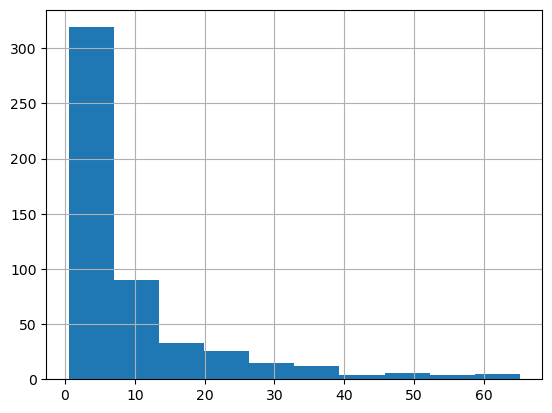

In [40]:
stroke_mri['wmh_vol'].hist()

<AxesSubplot:>

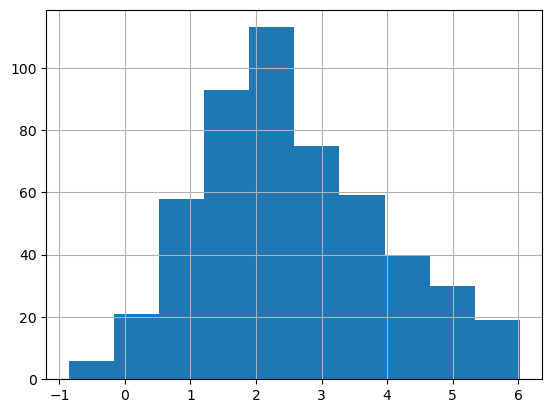

In [41]:
stroke_mri['log_base2_wmh_vol'] = np.log2(stroke_mri['wmh_vol'])
#data['logarithm_base2'] = np.log2(data['Salary'])
stroke_mri['log_base2_wmh_vol'].hist()

<AxesSubplot:>

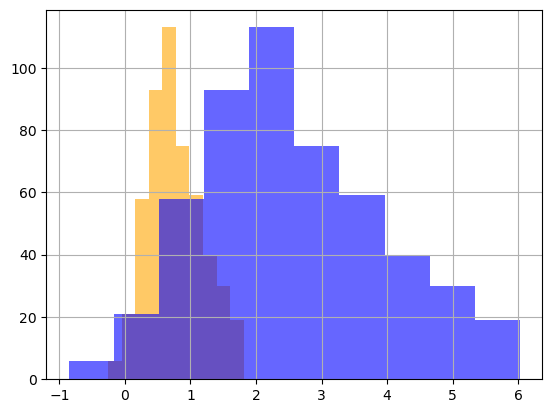

In [43]:
stroke_mri['log_base10_wmh_vol'] = np.log10(stroke_mri['wmh_vol'])
stroke_mri['log_base10_wmh_vol'].hist(color='orange', alpha=0.6, )
stroke_mri['log_base2_wmh_vol'].hist(color='blue', alpha=0.6, )

So a log base 10 should better distribute out WMH, but will make some values negative,

but what about in the case of why_count, where one was normally distributed and the otehr not?

<AxesSubplot:>

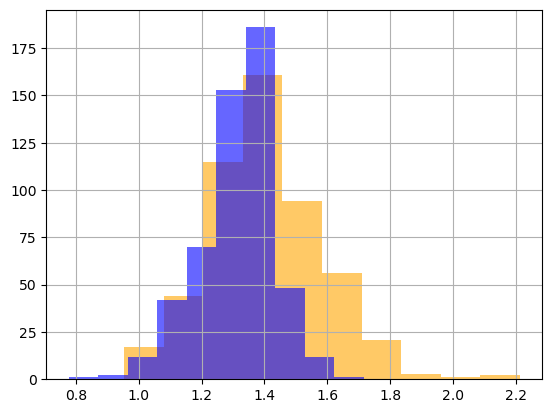

In [44]:
stroke_mri['log_base10_wmh_count'] = np.log10(stroke_mri['wmh_count'])
top['log_base10_wmh_count'] = np.log10(top['wmh_count'])
stroke_mri['log_base10_wmh_count'].hist(color='orange', alpha=0.6, )
top['log_base10_wmh_count'].hist(color='blue', alpha=0.6, )

Still looks OK. Let us try using the log base 10 for both, and see if it improves harmonized predictions

In [46]:
top['log_base10_wmh_vol'] = np.log10(top['wmh_vol'])
stroke_mri['wmh_count'] = stroke_mri['log_base10_wmh_count']
stroke_mri['wmh_vol'] = stroke_mri['log_base10_wmh_vol']
top['wmh_count'] = top['log_base10_wmh_count']
top['wmh_vol'] = top['log_base10_wmh_vol']

In [50]:
list_of_parameters = [
    'participant_id', 
    'age',
    'sex',
    'gm_vol',
    'wm_vol',
    'csf_vol',
    'gm_ivc_ratio',
    'gmwm_ivc_ratio',
    'wmh_vol',
    'wmh_count',
    'deepwm_b_cov',
    'aca_b_cov',
    'mca_b_cov',
    'pca_b_cov',
    'totalgm_b_cov',
    'deepwm_b', 
    'aca_b', # we 
    'mca_b', # we 
    'pca_b', # we 
    'totalgm_b', 
]
top_loged = top[list_of_parameters]
stroke_mri_loged = stroke_mri[list_of_parameters]

In [ ]:
# save off log based datasets

